In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

In [2]:
df = pd.read_csv('Crimes_-_One_year_prior_to_present.csv')

In [3]:
df.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF121694,12/07/2021 01:00:00 PM,052XX S BLACKSTONE AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,234,4.0,06,NaN,NaN,NaN,NaN,NaN
1,JE446397,11/15/2021 12:00:00 AM,020XX W 52ND ST,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,N,Y,932,16.0,08B,NaN,NaN,NaN,NaN,NaN
2,JF156654,11/01/2021 12:00:00 AM,020XX W ARMITAGE AVE,1120,DECEPTIVE PRACTICE,FORGERY,GAS STATION,N,N,1432,32.0,10,NaN,NaN,NaN,NaN,NaN
3,JF104823,12/30/2021 03:45:00 PM,017XX N CICERO AVE,1206,DECEPTIVE PRACTICE,"THEFT BY LESSEE, MOTOR VEHICLE",COMMERCIAL / BUSINESS OFFICE,N,N,2533,37.0,11,NaN,NaN,NaN,NaN,NaN
4,JE266628,06/15/2021 09:30:00 AM,080XX S DREXEL AVE,0820,THEFT,$500 AND UNDER,STREET,N,N,631,8.0,06,1183633.0,1851786.0,41.748486,-87.602675,"(41.748486365, -87.602675062)"


In [4]:
df.isnull().sum()

CASE#                        0
DATE  OF OCCURRENCE          0
BLOCK                        0
 IUCR                        0
 PRIMARY DESCRIPTION         0
 SECONDARY DESCRIPTION       0
 LOCATION DESCRIPTION      660
ARREST                       0
DOMESTIC                     0
BEAT                         0
WARD                        14
FBI CD                       0
X COORDINATE              3684
Y COORDINATE              3684
LATITUDE                  3684
LONGITUDE                 3684
LOCATION                  3684
dtype: int64

In [5]:
df['DATE  OF OCCURRENCE'].unique()

array(['12/07/2021 01:00:00 PM', '11/15/2021 12:00:00 AM',
       '11/01/2021 12:00:00 AM', ..., '12/14/2021 11:44:00 AM',
       '03/07/2022 04:46:00 PM', '03/07/2022 11:35:00 AM'], dtype=object)

In [6]:
df.fillna("NULL", inplace = True)

In [7]:
df['DATE  OF OCCURRENCE'] = pd.to_datetime(df['DATE  OF OCCURRENCE'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208171 entries, 0 to 208170
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CASE#                   208171 non-null  object        
 1   DATE  OF OCCURRENCE     208171 non-null  datetime64[ns]
 2   BLOCK                   208171 non-null  object        
 3    IUCR                   208171 non-null  object        
 4    PRIMARY DESCRIPTION    208171 non-null  object        
 5    SECONDARY DESCRIPTION  208171 non-null  object        
 6    LOCATION DESCRIPTION   208171 non-null  object        
 7   ARREST                  208171 non-null  object        
 8   DOMESTIC                208171 non-null  object        
 9   BEAT                    208171 non-null  int64         
 10  WARD                    208171 non-null  object        
 11  FBI CD                  208171 non-null  object        
 12  X COORDINATE            208171

In [9]:
time = df['DATE  OF OCCURRENCE'].iloc[0]
df['Hour'] = df['DATE  OF OCCURRENCE'].apply(lambda time:time.hour)
df['Month'] = df['DATE  OF OCCURRENCE'].apply(lambda time:time.month)
df['Day of Week'] = df['DATE  OF OCCURRENCE'].apply(lambda time:time.dayofweek)

In [10]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

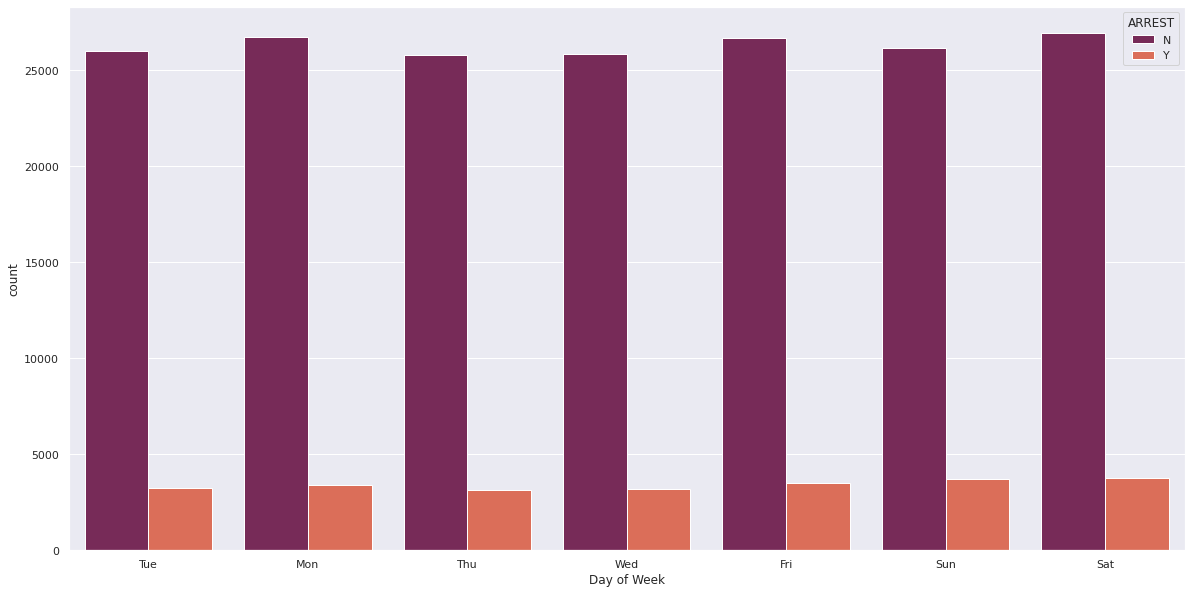

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Day of Week', data = df, hue = 'ARREST', palette = 'rocket')

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

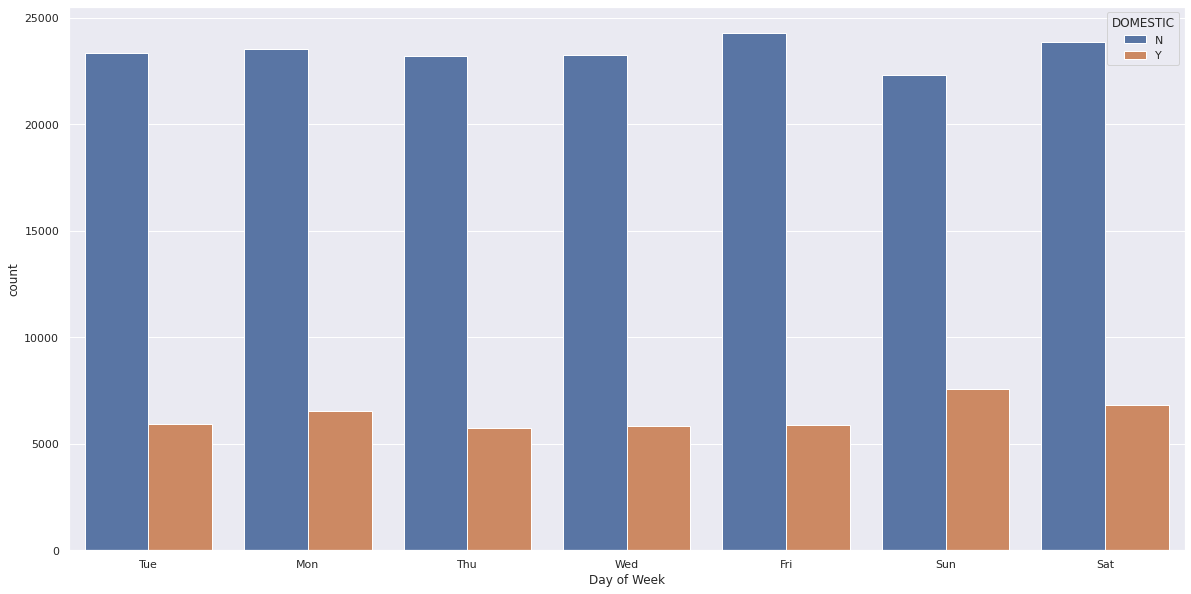

In [37]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x='Day of Week', data = df, hue = 'DOMESTIC')

In [13]:
byMonth = df.groupby('Month').count()
byMonth.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,,
1,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162,15162
2,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776,14776
3,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646,16646
4,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385,15385
5,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614,17614


<AxesSubplot:xlabel='Month'>

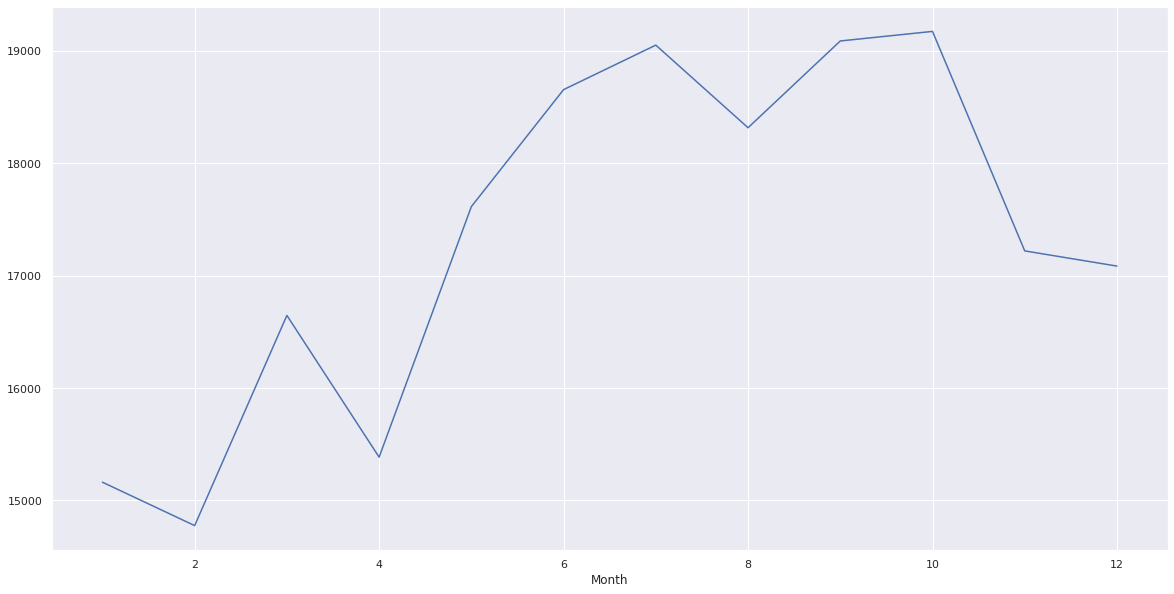

In [14]:
byMonth['BLOCK'].plot()

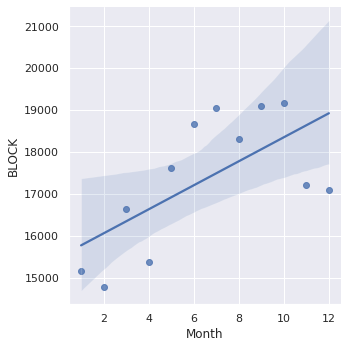

In [15]:
sns.lmplot(x='Month', y ='BLOCK', data = byMonth.reset_index())

In [16]:
df['Date']= df['DATE  OF OCCURRENCE'].apply(lambda p:p.date())

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

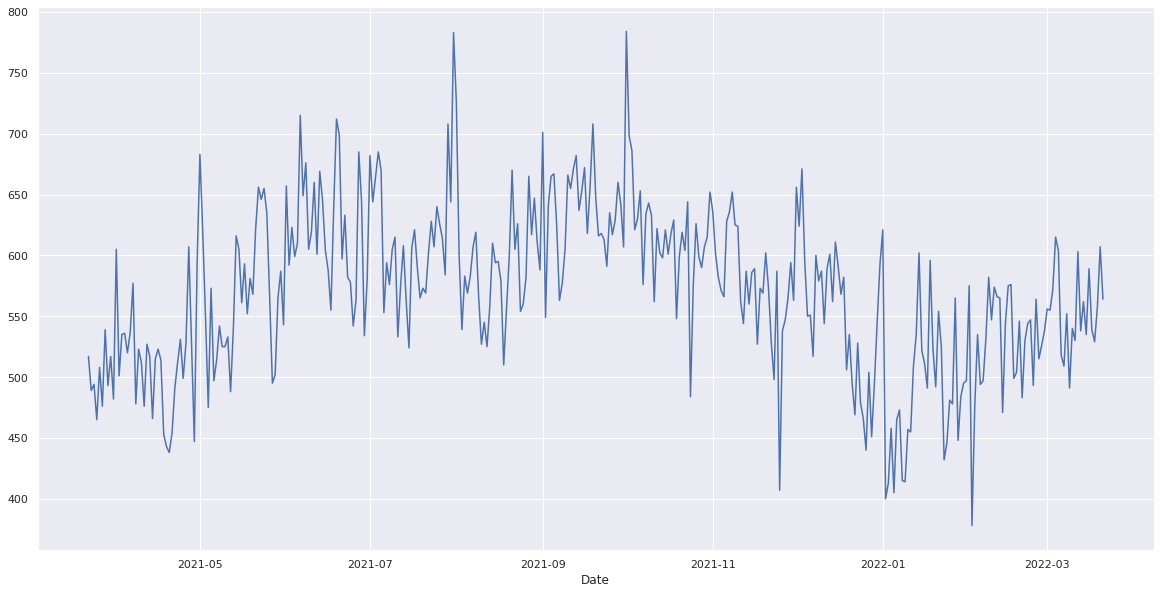

In [17]:
df.groupby('Date').count()['BLOCK'].plot()
plt.tight_layout

In [18]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['CASE#'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1915,903,828,685,521,500,539,696,1011,1362,...,1461,1666,1513,1647,1600,1588,1574,1400,1497,1427
Mon,2179,939,815,636,551,510,561,795,1110,1344,...,1441,1587,1573,1613,1543,1558,1506,1411,1317,1118
Sat,2165,1361,1222,978,766,560,537,621,829,1111,...,1407,1440,1484,1503,1509,1522,1574,1545,1591,1515
Sun,2333,1405,1337,1100,855,628,566,622,774,1055,...,1309,1371,1422,1463,1496,1542,1504,1457,1382,1208
Thu,1893,830,745,586,492,453,574,793,1035,1327,...,1427,1648,1522,1610,1512,1460,1513,1349,1241,1106


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

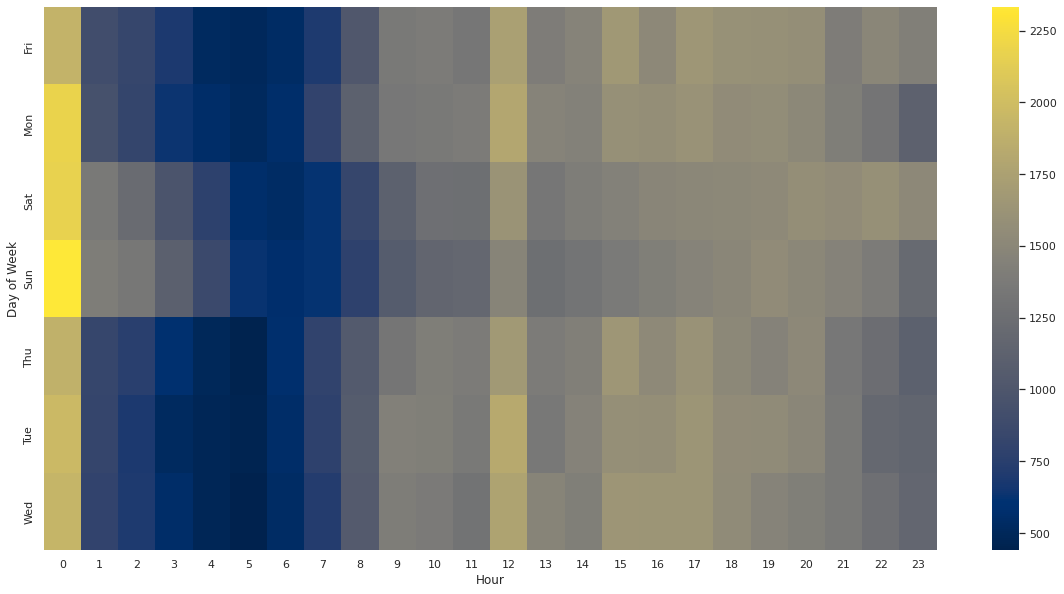

In [19]:
sns.heatmap(dayHour, cmap='cividis')

In [20]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['CASE#'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,2077,2169,2182,2653,2254,2440,3127,2406,2516,3250,2217,2898
Mon,2304,2144,2645,2018,2866,2535,2436,2998,2584,2387,2996,2191
Sat,2567,2120,2241,2092,3051,2486,3290,2504,2612,3201,2364,2187
Sun,2252,1977,2202,1964,2939,2768,2448,3191,2663,3073,2334,2085
Thu,2057,2042,2116,2536,2100,2375,3092,2232,3046,2383,2113,2868


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

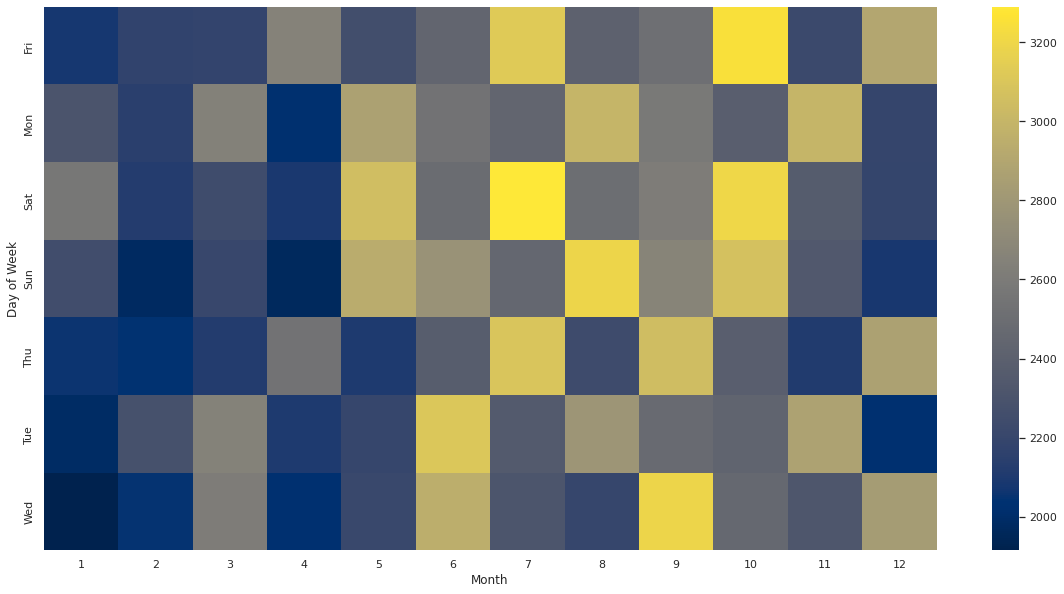

In [21]:
sns.heatmap(dayMonth, cmap='cividis')

In [22]:
df.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION',
       'Hour', 'Month', 'Day of Week', 'Date'],
      dtype='object')

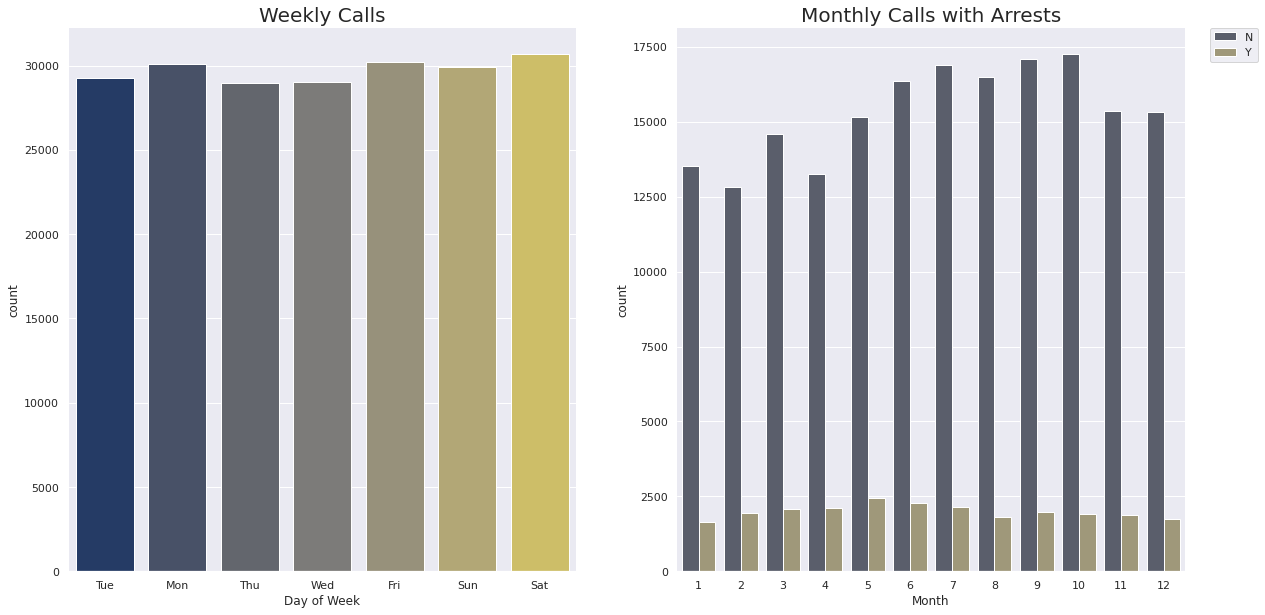

In [23]:
fig, axes = plt.subplots(1,2, figsize = (20,10))
sns.countplot(x='Day of Week', data = df, palette = 'cividis', ax = axes[0])
axes[0].set_title('Weekly Calls', size = 20)

sns.countplot(x='Month', data =df, hue = 'ARREST', palette='cividis', ax=axes[1])
axes[1].set_title('Monthly Calls with Arrests', size = 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

sns.despine(bottom=False, left= True)

In [24]:
df['Day of Week'].value_counts()\
                .head(20)\
                .to_frame(name="Count")\
                .reset_index()\
                .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,Sat,30715
1,Fri,30189
2,Mon,30104
3,Sun,29896
4,Tue,29251
5,Wed,29056
6,Thu,28960


In [25]:
df['Month'].value_counts()\
            .head(12)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,10,19173
1,9,19088
2,7,19051
3,6,18655
4,8,18316
5,5,17614
6,11,17220
7,12,17085
8,3,16646
9,4,15385


/home/michael/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


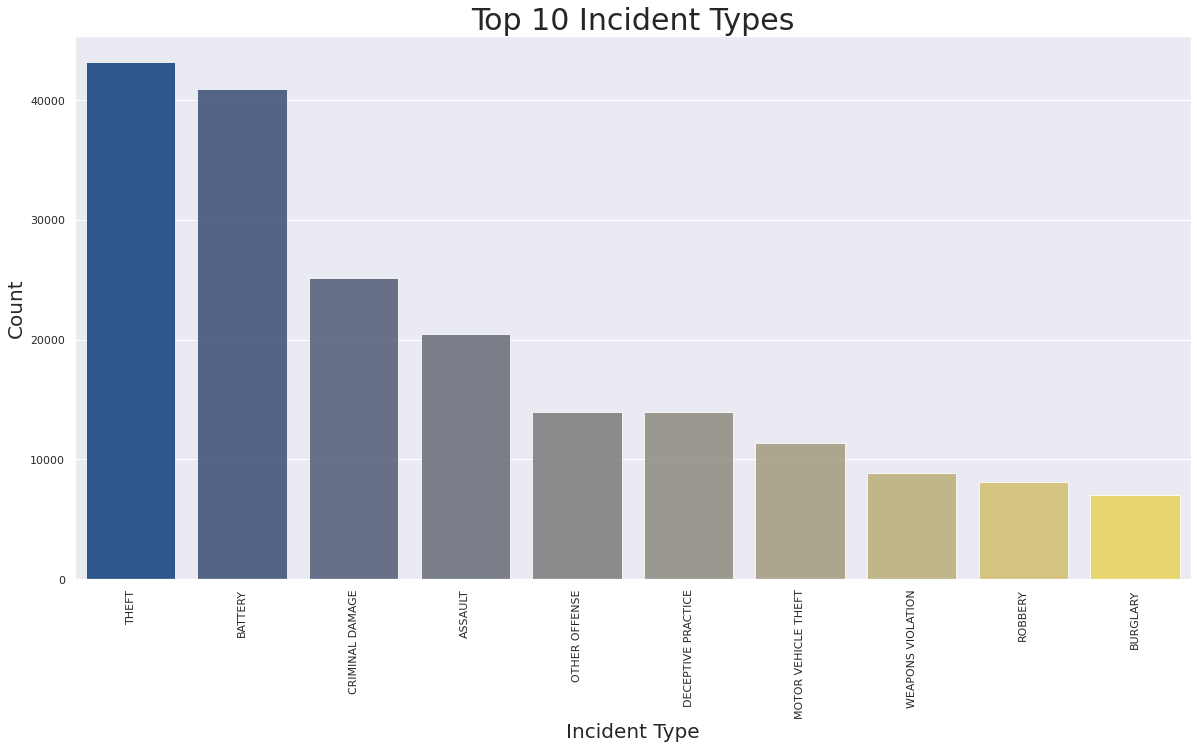

In [26]:
type_count = df[' PRIMARY DESCRIPTION'].value_counts()
type_count = type_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(type_count.index, type_count.values, alpha=0.8, saturation = 1, palette = 'cividis')
plt.title('Top 10 Incident Types', fontsize = 30)
plt.xlabel('Incident Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [27]:
df[' PRIMARY DESCRIPTION'].value_counts()\
                        .head(20)\
                        .to_frame(name = 'Count')\
                        .reset_index()\
                        .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,THEFT,43211
1,BATTERY,40911
2,CRIMINAL DAMAGE,25127
3,ASSAULT,20498
4,OTHER OFFENSE,13957
5,DECEPTIVE PRACTICE,13924
6,MOTOR VEHICLE THEFT,11381
7,WEAPONS VIOLATION,8844
8,ROBBERY,8084
9,BURGLARY,7017


/home/michael/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


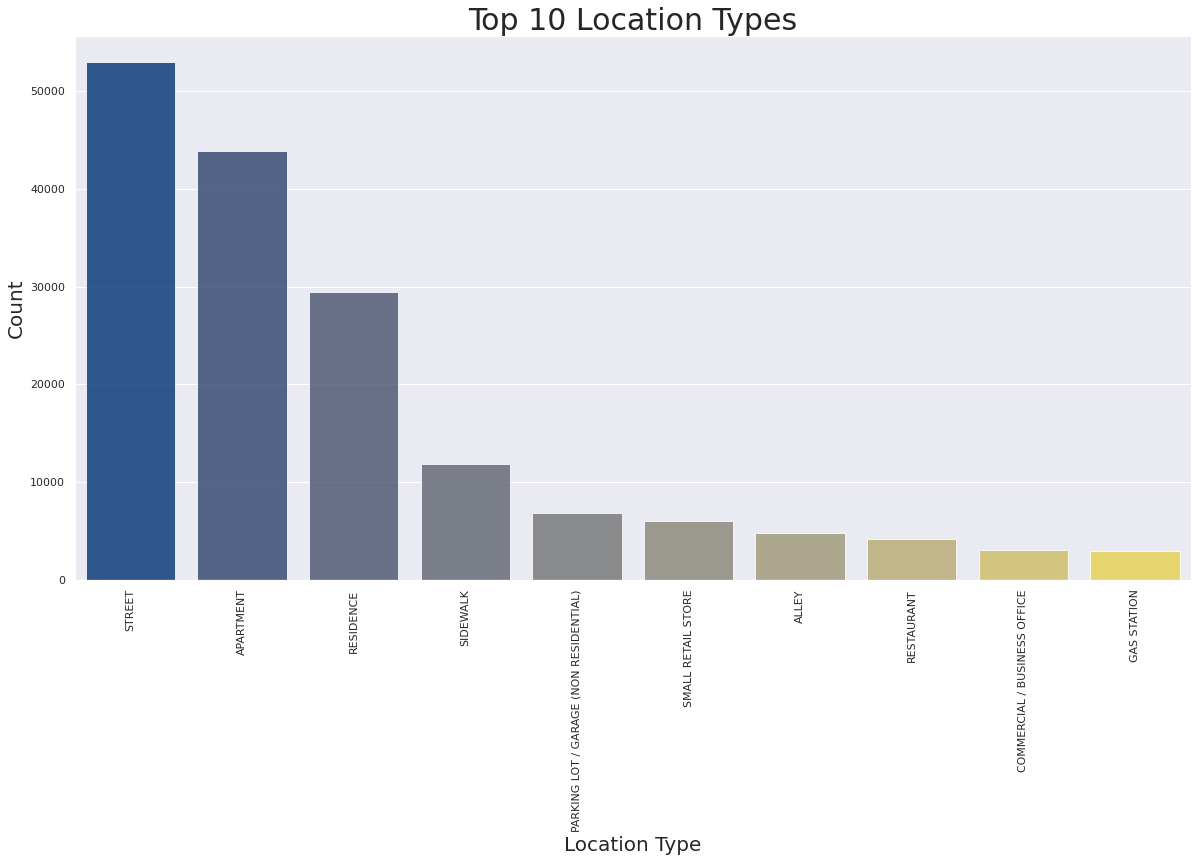

In [28]:
type_count = df[' LOCATION DESCRIPTION'].value_counts()
type_count = type_count[:10]
plt.figure(figsize = (20,10))
sns.barplot(type_count.index, type_count.values, alpha=0.8, saturation = 1, palette = 'cividis')
plt.title('Top 10 Location Types', fontsize = 30)
plt.xlabel('Location Type', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [29]:
df[' LOCATION DESCRIPTION'].value_counts()\
                            .head(20)\
                            .to_frame(name='Count')\
                            .reset_index()\
                            .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,STREET,52968
1,APARTMENT,43904
2,RESIDENCE,29486
3,SIDEWALK,11805
4,PARKING LOT / GARAGE (NON RESIDENTIAL),6845
5,SMALL RETAIL STORE,6005
6,ALLEY,4747
7,RESTAURANT,4136
8,COMMERCIAL / BUSINESS OFFICE,3006
9,GAS STATION,2965


/home/michael/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


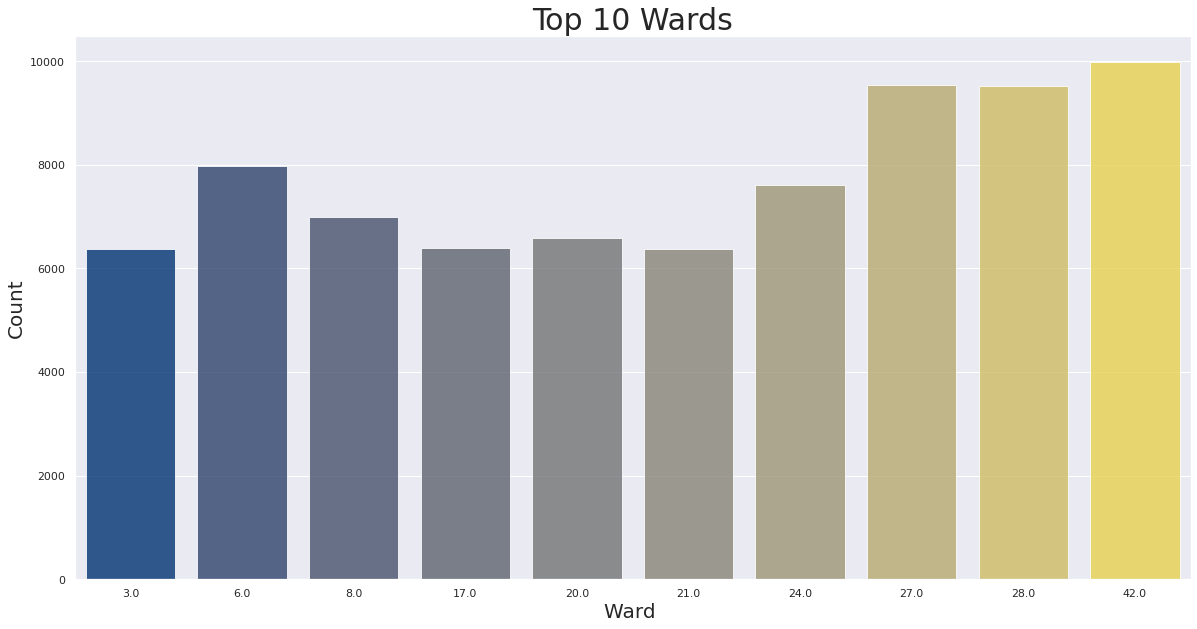

In [30]:
ward_count = df['WARD'].value_counts()
ward_count = ward_count[:10]
sns.barplot(ward_count.index, ward_count.values, alpha=0.8, saturation = 1, palette ='cividis')
plt.title('Top 10 Wards', fontsize = 30)
plt.xlabel('Ward ', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

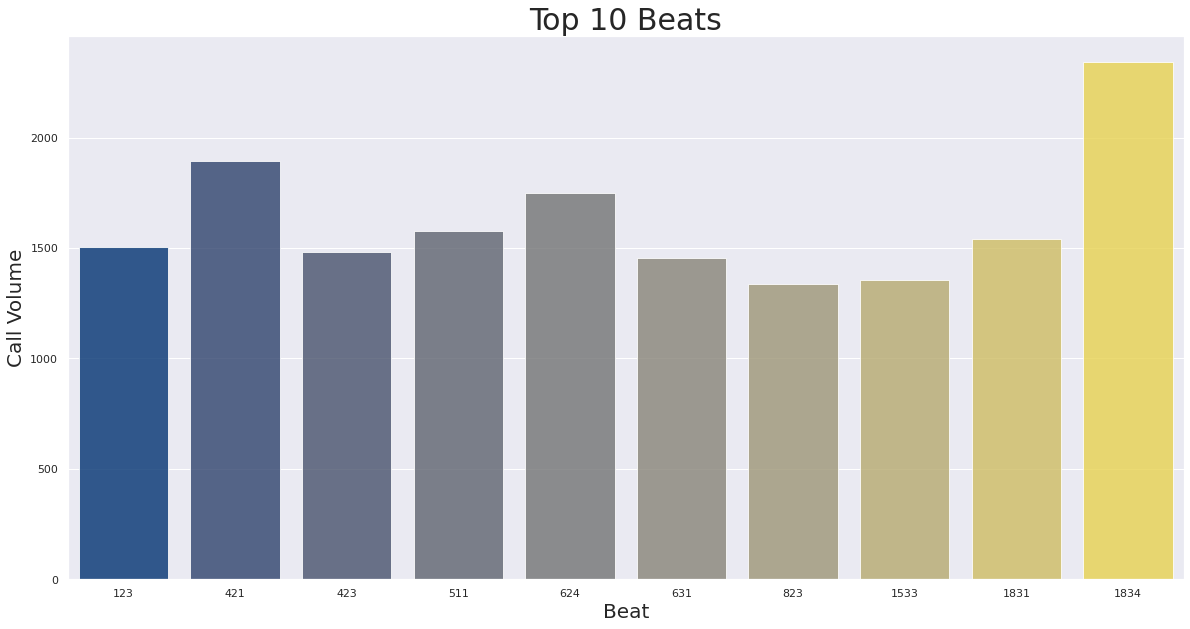

In [31]:
beat_count = df['BEAT'].value_counts()
beat_count = beat_count[:10]
sns.barplot(x= beat_count.index, y = beat_count.values, alpha = 0.8, saturation = 1, palette= 'cividis')
plt.title('Top 10 Beats', fontsize = 30)
plt.xlabel('Beat', fontsize = 20)
plt.ylabel('Call Volume', fontsize = 20)
plt.show()

In [32]:
df['BEAT'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap= 'Blues', subset='Count')

,index,Count
0,1834,2344
1,421,1894
2,624,1748
3,511,1575
4,1831,1543
5,123,1504
6,423,1484
7,631,1455
8,1533,1357
9,823,1337


In [33]:
df['BLOCK'].value_counts()\
            .head(20)\
            .to_frame(name='Count')\
            .reset_index()\
            .style.background_gradient(cmap='Blues', subset='Count')

,index,Count
0,0000X W TERMINAL ST,495
1,001XX N STATE ST,410
2,003XX E RANDOLPH ST,320
3,100XX W OHARE ST,228
4,0000X N STATE ST,215
5,064XX S DR MARTIN LUTHER KING JR DR,205
6,002XX E HURON ST,194
7,057XX S CICERO AVE,186
8,007XX N MICHIGAN AVE,170
9,0000X E GRAND AVE,166


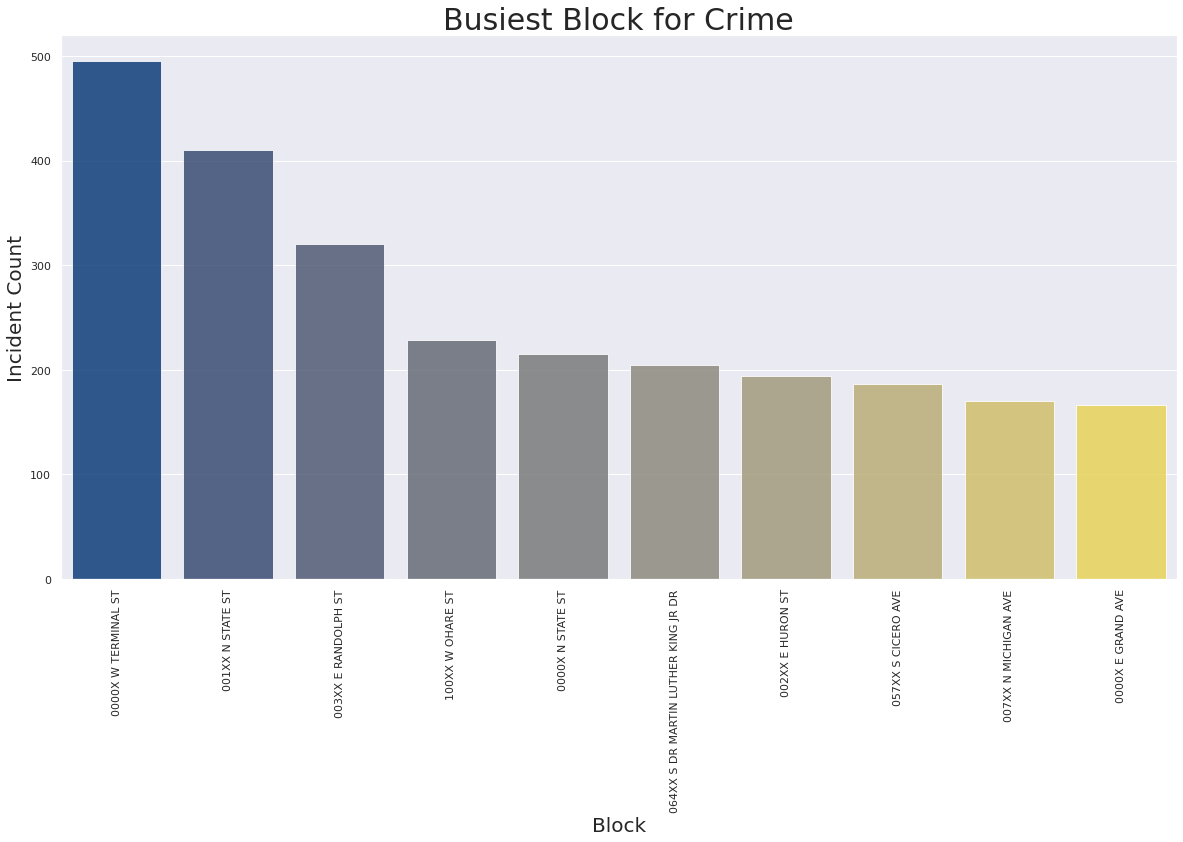

In [34]:
block_count = df['BLOCK'].value_counts()
block_count = block_count[:10]
sns.barplot(x = block_count.index, y= block_count.values, alpha=0.8, saturation =1, palette ='cividis')
plt.title('Busiest Block for Crime', fontsize = 30)
plt.xlabel('Block', fontsize = 20)
plt.ylabel('Incident Count', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()